In [3]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt


In [4]:
test_set = pd.read_csv('raw/TestSet.csv')
train_set = pd.read_csv('raw/TrainingSet.csv')
test_subset = pd.read_csv('raw/TestSubset.csv')
train_subset = pd.read_csv('raw/TrainingSubset.csv')

In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258588 entries, 0 to 258587
Data columns (total 28 columns):
EbayID                     258588 non-null float64
QuantitySold               258588 non-null int64
Price                      258588 non-null float64
PricePercent               258588 non-null float64
StartingBidPercent         258588 non-null float64
SellerName                 258588 non-null object
SellerClosePercent         258588 non-null float64
Category                   258588 non-null int64
PersonID                   258588 non-null int64
StartingBid                258588 non-null float64
AvgPrice                   258588 non-null float64
EndDay                     258588 non-null int64
HitCount                   258588 non-null int64
AuctionAvgHitCount         258588 non-null int64
ItemAuctionSellPercent     258588 non-null int64
SellerSaleAvgPriceRatio    258588 non-null float64
SellerAvg                  258588 non-null float64
SellerItemAvg              258588 non

In [6]:
print(train_set.shape)

(258588, 28)


In [7]:
print(train_set[:2])

         EbayID  QuantitySold  Price  PricePercent  StartingBidPercent  \
0  1.609830e+11             1  27.25        1.4787              0.0537   
1  3.905500e+11             1  43.00        1.4422              0.3350   

   SellerName  SellerClosePercent  Category  PersonID  StartingBid  \
0   petesandi            0.925926     73396      9174         0.99   
1  graphn4fun            0.990566     27278     11046         9.99   

          ...          AuctionHitCountAvgRatio  BestOffer  ReturnsAccepted  \
0         ...                               29   1.540541                0   
1         ...                               55   0.404762                0   

   IsHOF  ItemListedCount  AuctionCount  AuctionSaleCount  SellerAuctionCount  \
0      1                1           583               291                  54   
1      0                0           120                43                 106   

   SellerAuctionSaleCount  AuctionMedianPrice  
0                      50              

In [8]:
train=train_set.drop(['EbayID','QuantitySold','SellerName'],axis=1)
train_target=train_set['QuantitySold']

In [9]:
print(train.shape)

(258588, 25)


In [10]:
print(train_target.shape)

(258588,)


In [11]:
n_trainSamples, n_features = train.shape

In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

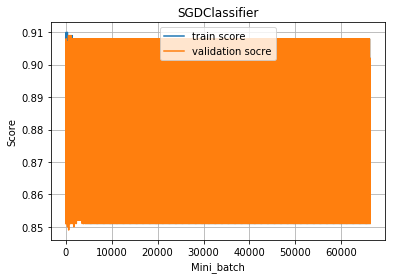

In [16]:
def plot_learning(clf,title):

    plt.figure()
    # 记录上一次训练结果在本次batch上的预测情况
    validationScore = []
    # 记录加上本次batch训练结果后的预测情况
    trainScore = []
    # 最小训练批数
    mini_batch = 1000
    n_iter=1
    for it in range(n_iter):
        for idx in range(int(np.ceil(n_trainSamples / mini_batch))):
            x_batch = train[idx * mini_batch: min((idx + 1) * mini_batch, n_trainSamples)]
            y_batch = train_target[idx * mini_batch: min((idx + 1) * mini_batch, n_trainSamples)]

            if idx > 0:
                validationScore.append(clf.score(x_batch, y_batch))
            clf.partial_fit(x_batch, y_batch, classes=range(5))
            if idx > 0:
                trainScore.append(clf.score(x_batch, y_batch))
    plt.plot(trainScore, label="train score")
    plt.plot(validationScore, label="validation socre")
    plt.xlabel("Mini_batch")
    plt.ylabel("Score")
    plt.legend(loc='best')
    plt.grid()
    plt.title(title)

# 对数据进行归一化
scaler = StandardScaler()
train = scaler.fit_transform(train)
#PCA降维-影响性能
#train=decomposition.TruncatedSVD(n_components=10).fit_transform(train)
# 创建SGDClassifier
clf = SGDClassifier(loss="hinge",penalty='l1', alpha=0.01)
plot_learning(clf,"SGDClassifier")

plt.show()

In [17]:
from sklearn.metrics import (precision_score, recall_score, f1_score)
# 首先也是准备好测试数据，进行归一化处理
test = test_set.drop(['EbayID','QuantitySold','SellerName'],axis=1)
test_target = test_set['QuantitySold']
test = scaler.fit_transform(test)
#test=decomposition.TruncatedSVD(n_components=10).fit_transform(test)
# 利用训练好的分类器进行预测
test_pred = clf.predict(test) 

print("SGDClassifier training performance on testing dataset:" )
print("\tPrecision: %1.3f " % precision_score(test_target, test_pred))
print("\tRecall: %1.3f" % recall_score(test_target, test_pred))
print("\tF1: %1.3f \n" % f1_score(test_target, test_pred))

SGDClassifier training performance on testing dataset:
	Precision: 0.845 
	Recall: 0.707
	F1: 0.770 



In [18]:
clf.score(test,test_pred)

1.0

In [ ]:
SGDClassifier training performance on testing dataset:
	Precision: 0.821 
	Recall: 0.722
	F1: 0.768 

In [15]:
258588/1000

258